# Healthcare - PGP

In [82]:
!pip install pandas numpy matplotlib seaborn scikit-learn imblearn

## import important libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report,roc_curve, confusion_matrix,auc

## lest load dataset

In [3]:
file_path = 'C:/Users/A1221/Desktop/certificate/Projects/SICapstone2/dataset.csv'

df = pd.read_csv(file_path)


In [4]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


## dataset overview

In [5]:
df.shape

(768, 9)

In [6]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

## null values treatment

## According to problem statement, a value of zero in the following columns  indicates missing value

In [7]:
cols_zero = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[cols_zero] = df[cols_zero].replace(0, np.NaN)

In [8]:
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

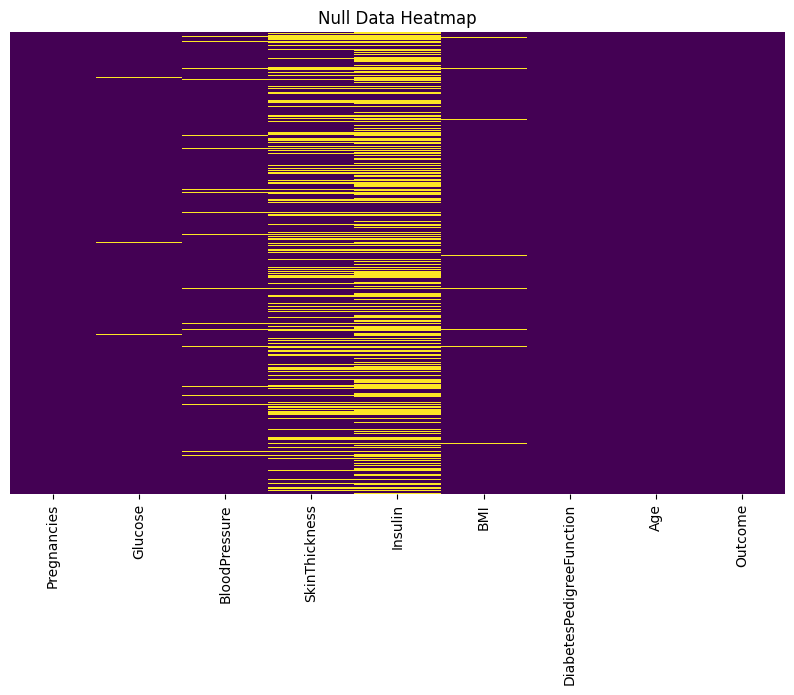

In [9]:
# Create a heatmap to visualize null data
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False, yticklabels=False)

plt.title('Null Data Heatmap')
plt.show()

In [10]:
cols_median = ['Insulin']
df[cols_median] = df[cols_median].fillna(df[cols_median].median())

In [11]:
cols_mean = ['Glucose', 'BloodPressure', 'SkinThickness', 'BMI']
df[cols_mean] = df[cols_mean].fillna(df[cols_mean].mean())

In [12]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [124]:
#Descriptive Statistics:

In [125]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,140.671875,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.435949,12.096346,8.790942,86.383060,6.875151,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,29.153420,125.000000,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


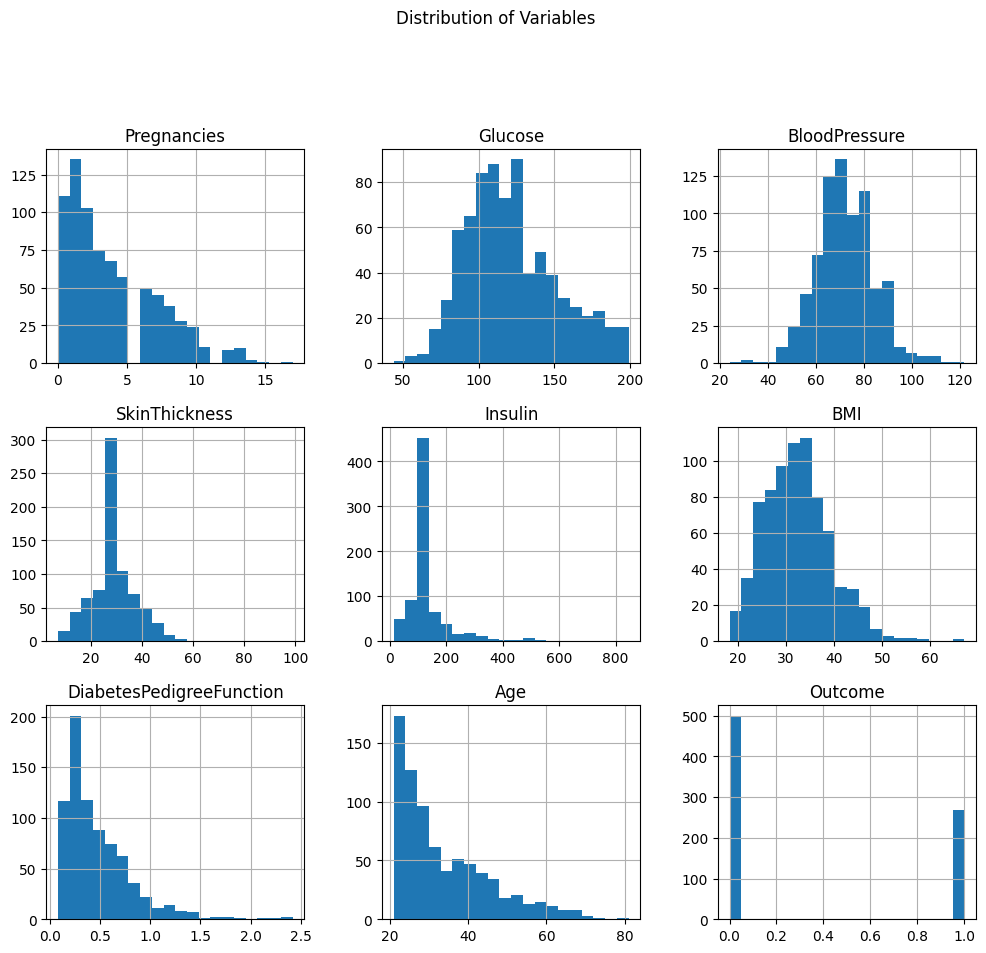

In [126]:
#Distribution of Variables:

# Histograms of variables
df.hist(figsize=(12, 10), bins=20)
plt.suptitle('Distribution of Variables', y=1.02)
plt.show()

In [35]:
############################################## STEP 1.2 FINISHED ###################################################

C:\Users\A1221\AppData\Local\Temp\ipykernel_5764\3241150938.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df.dtypes, palette='viridis')


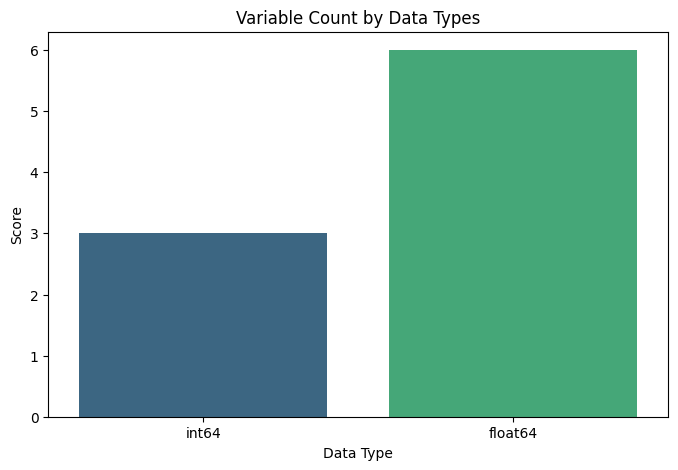

In [127]:
# Criar um count plot
plt.figure(figsize=(8, 5))
sns.countplot(x=df.dtypes, palette='viridis')
plt.title('Variable Count by Data Types')
plt.xlabel('Data Type')
plt.ylabel('Score')
plt.show()

In [181]:
############################################## STEP 1.3 FINISHED ###################################################

In [182]:
#4.	Check the balance of the data by plotting the count of outcomes by their value. Describe your findings and plan future course of action.

In [128]:
# Count of classes in the target variable
outcome_counts = df['Outcome'].value_counts()


C:\Users\A1221\AppData\Local\Temp\ipykernel_5764\3277983772.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Outcome', data=df, palette='Set1')


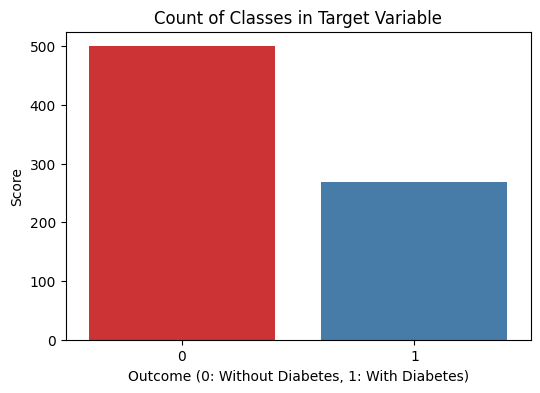

In [130]:
# Create a bar chart
plt.figure(figsize=(6, 4))
sns.countplot(x='Outcome', data=df, palette='Set1')
plt.title('Count of Classes in Target Variable')
plt.xlabel('Outcome (0: Without Diabetes, 1: With Diabetes)')
plt.ylabel('Score')
plt.show()


In [131]:
print("Class Count:")
print(outcome_counts)

Class Count:
Outcome
0    500
1    268
Name: count, dtype: int64


In [54]:
#Because the difference between 0 and 1 is very large, we have to try to match the number of examples to better study the data

In [132]:
df_X = df.drop('Outcome', axis=1)
df_y = df['Outcome']
print(df_X.shape, df_y.shape)

(768, 8) (768,)


In [133]:
from imblearn.over_sampling import SMOTE

In [134]:
df_X_sample, df_y_resampled = SMOTE(random_state=108).fit_resample(df_X, df_y)
print(df_X_resampled.shape, df_y_resampled.shape)

(1000, 8) (1000,)


Outcome
1    500
0    500
Name: count, dtype: int64

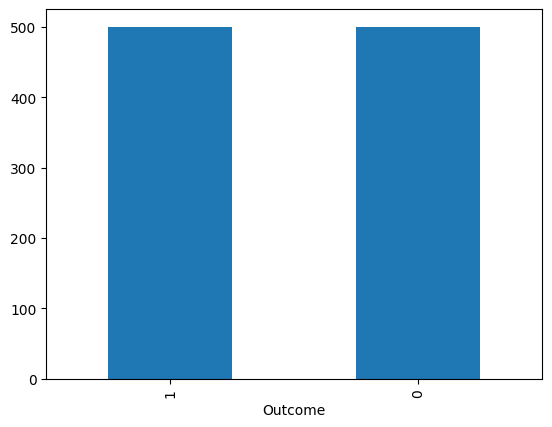

In [135]:
df_y_resampled.value_counts().plot(kind='bar')
df_y_resampled.value_counts()

In [136]:
df_resampled = pd.concat([df_X_resampled, df_y_resampled], axis=1)
df_resampled

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.600000,0.627000,50,1
1,1,85,66,29,0,26.600000,0.351000,31,0
2,8,183,64,0,0,23.300000,0.672000,32,1
3,1,89,66,23,94,28.100000,0.167000,21,0
4,0,137,40,35,168,43.100000,2.288000,33,1
...,...,...,...,...,...,...,...,...,...
995,1,168,73,0,0,37.763039,0.584403,35,1
996,0,144,66,27,128,35.375038,0.386455,33,1
997,4,138,0,0,0,46.521271,0.360276,33,1
998,4,113,76,0,0,30.400115,0.327002,45,1


In [137]:
############################################## STEP 4 FINISHED ###################################################

In [138]:
# 5.	Create scatter charts between the pair of variables to understand the relationships. Describe your findings.

In [139]:
# variables relevant to the scatterplot matrix
selected_variables = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'Age', 'Outcome']

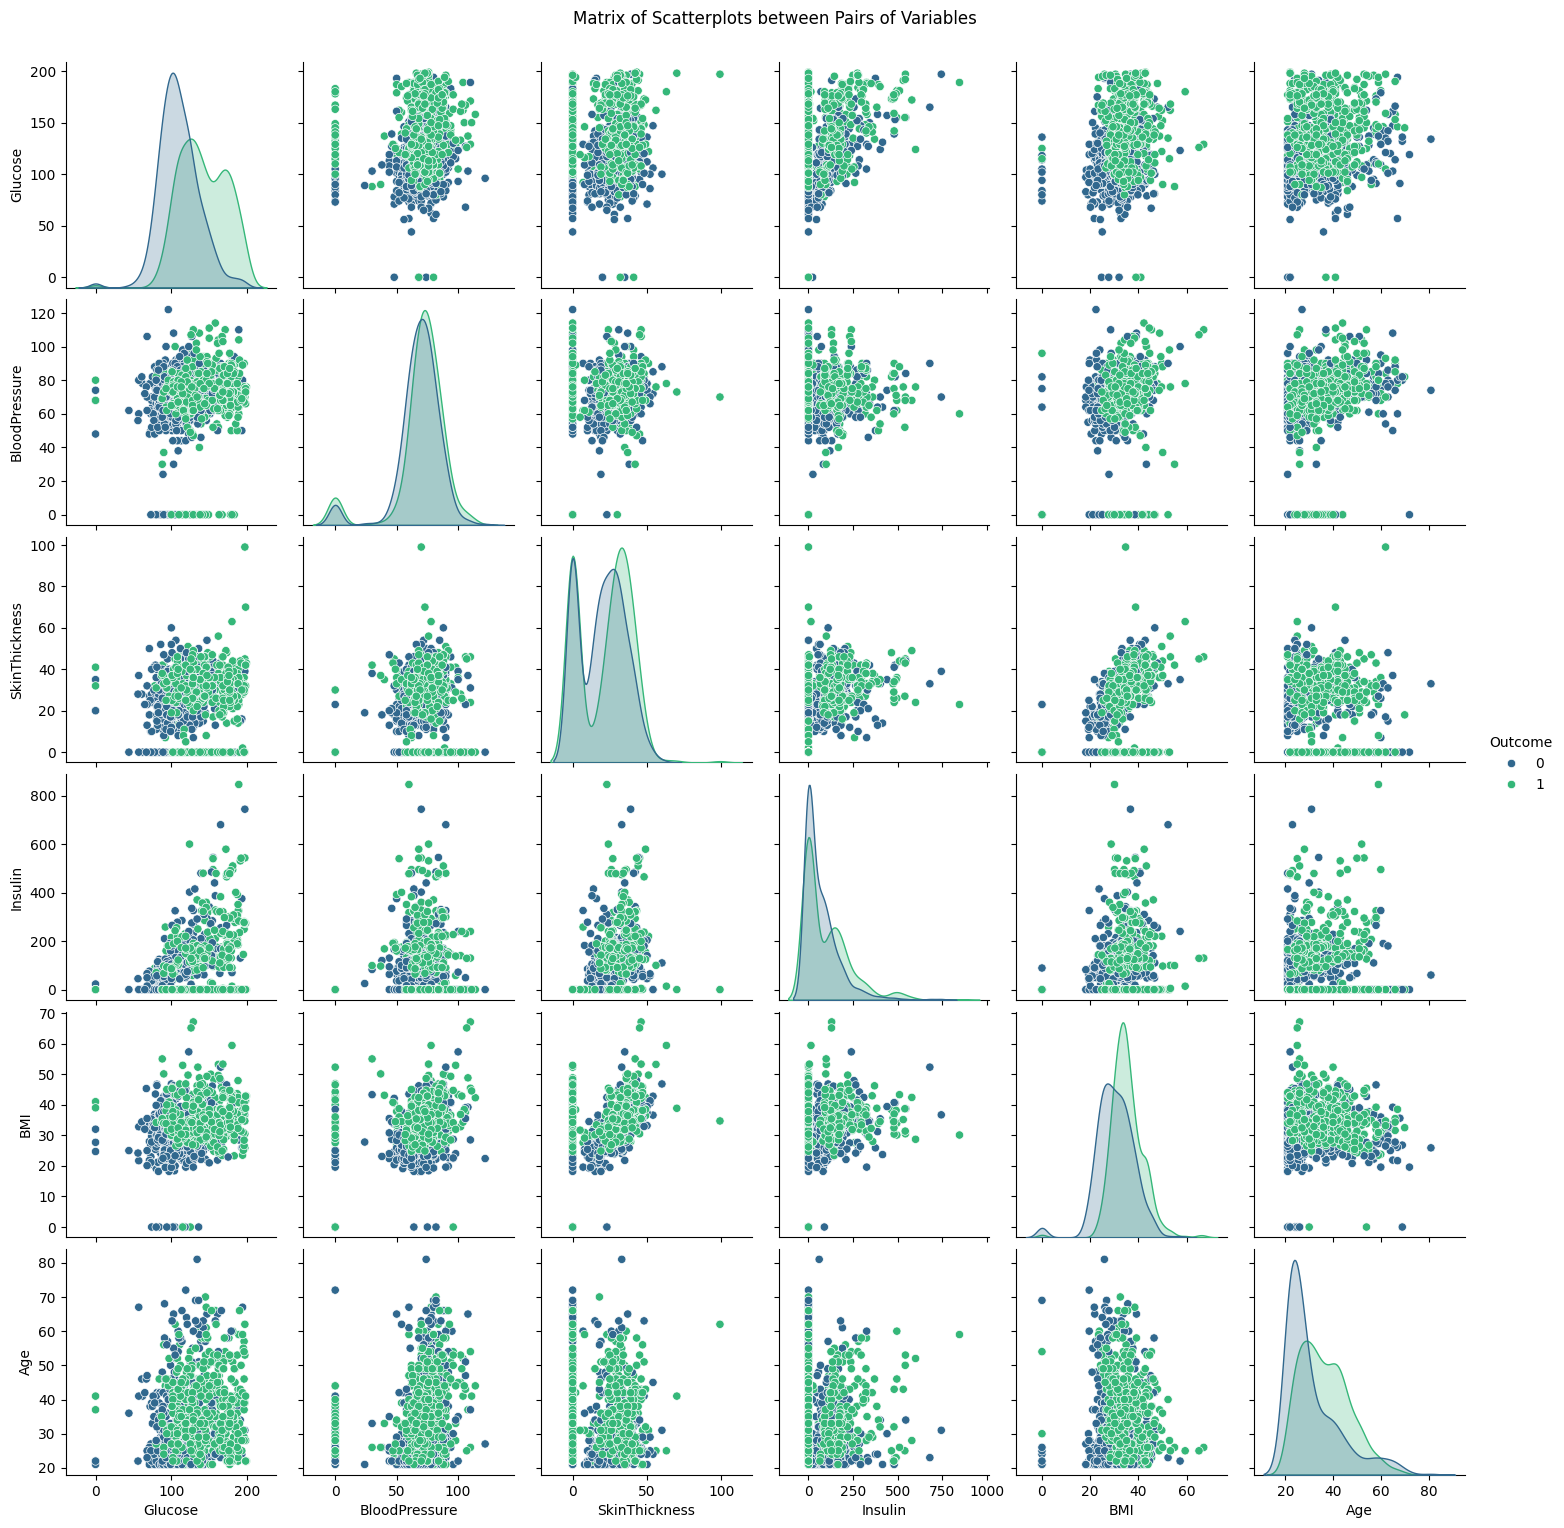

In [140]:
# scatterplot matrix
sns.pairplot(df_resampled[selected_variables], hue='Outcome', palette='viridis')
plt.suptitle('Matrix of Scatterplots between Pairs of Variables', y=1.02)
plt.show()

* as we can see variables such as Glucose and age are variables that in themselves already show interesting results
* other variables would have to be better studied to know more about

In [190]:
############################################## STEP 5 FINISHED ###################################################

In [191]:
# 6.	Perform correlation analysis. Visually explore it using a heat map

In [65]:
# Calculate the correlation matrix
correlation_matrix = df_resampled.corr()

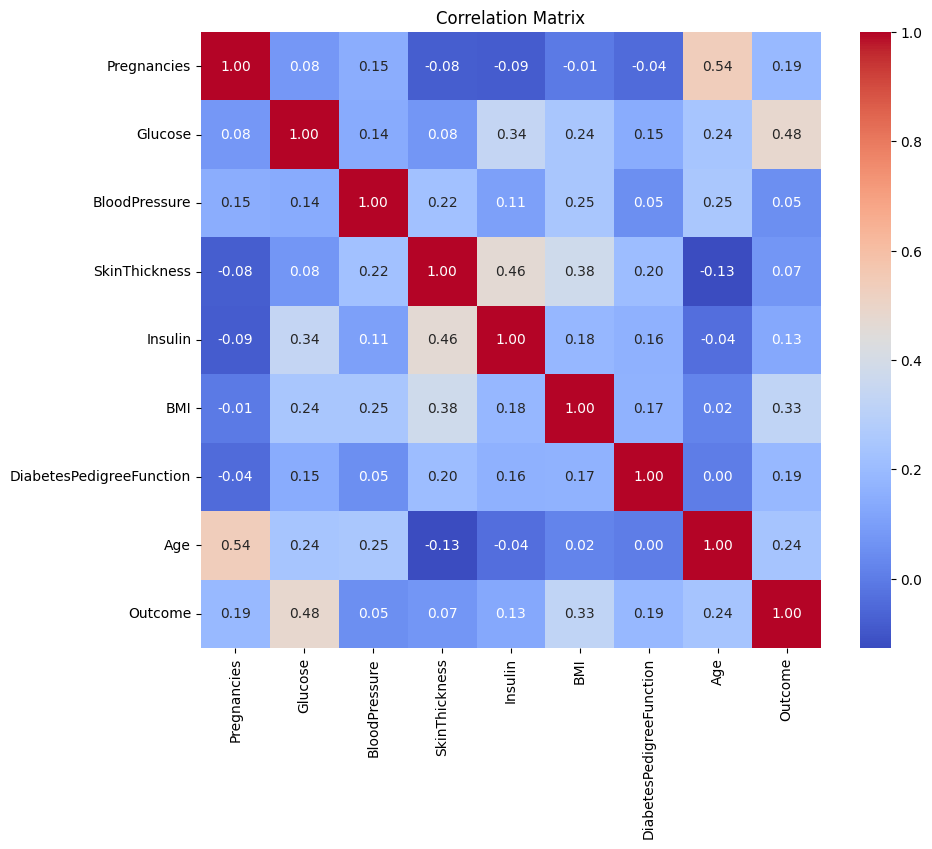

In [66]:
# heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

* how can we see a strong relationship between age-pregnancy and glucose-outcome

In [194]:
############################################## STEP 6 FINISHED ###################################################

# 2.1.	Devise strategies for model building. It is important to decide the right validation framework. Express your thought process. 

### LogisticRegression

In [142]:
X_train, X_test, y_train, y_test = train_test_split(df_X_resampled, df_y_resampled, test_size=0.15, random_state =10)

In [143]:
# Create and train the Logistic Regression model
logistic_model = LogisticRegression(max_iter=1000, random_state=42)
logistic_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [144]:
# Make predictions on the test set
y_pred_logistic = logistic_model.predict(X_test)
y_pred_prob_logistic = logistic_model.predict_proba(X_test)[:, 1]

In [145]:
# Evaluation of the Logistic Regression model
print("AUC-ROC Score (Logistic Regression):", roc_auc_score(y_test, y_pred_prob_logistic))
print("Classification Report (Logistic Regression):")
print(classification_report(y_test, y_pred_logistic))

AUC-ROC Score (Logistic Regression): 0.8645982783357246
Classification Report (Logistic Regression):
              precision    recall  f1-score   support

           0       0.76      0.76      0.76        68
           1       0.80      0.80      0.80        82

    accuracy                           0.79       150
   macro avg       0.78      0.78      0.78       150
weighted avg       0.79      0.79      0.79       150



In [176]:
# Calculate ROC curve
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_pred_prob_logistic)
roc_auc_lr = auc(fpr_lr, tpr_lr)

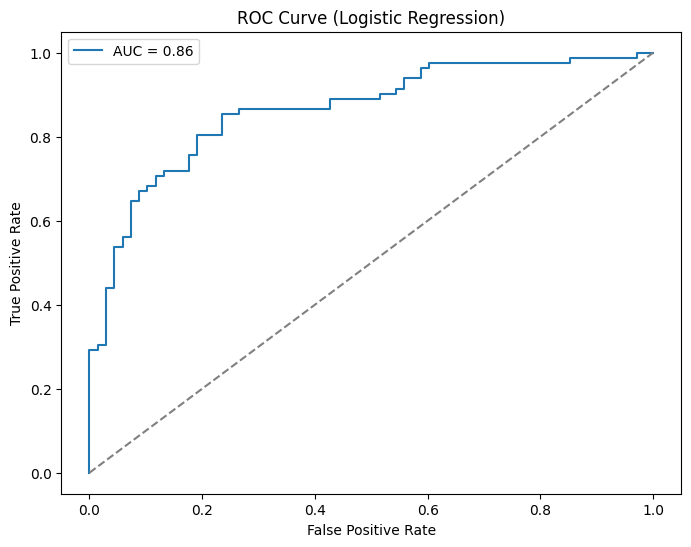

In [177]:
# Plot the ROC curve for the Logistic Regression model
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, label=f'AUC = {roc_auc_lr:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Logistic Regression)')
plt.legend()
plt.show()

# Model Parameters:

* max_iter=1000: This parameter defines the maximum number of iterations that the optimizer should perform when fitting the model to the data. In this case, it is set to 1000 to ensure that the optimizer achieves convergence.

* random_state=42: This parameter defines the seed for generating random numbers. Using a fixed seed ensures that training is reproducible, meaning that when you run training again with the same data and parameters, the results will be the same.

## Model Evaluation:

* roc_auc_score: This function calculates the area under the ROC curve (AUC-ROC), which is a metric that evaluates the discriminative ability of the model. A higher value indicates better performance.

* classification_report: This function generates a classification report that includes various metrics such as precision, recall and f1-score to evaluate the model's performance in different aspects.

## Visualization of the ROC Curve:

* The AUC-ROC metric of 0.86 indicates that the model has good discriminatory ability, with a ROC curve that departs significantly from the random reference line. This suggests that the model is able to effectively distinguish between positive and negative instances at different probability thresholds.iva do modelo.er=1000er=1000

In [146]:
###############################################################################

### decision_tree_model

In [171]:
from sklearn.tree import DecisionTreeClassifier

# Create and train the Decision Tree model
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train, y_train)

# Make predictions on the test se
y_pred_dt = decision_tree_model.predict(X_test)
y_pred_prob_dt = decision_tree_model.predict_proba(X_test)[:, 1]

# Evaluation of the Decision Tree model
print("Classification Report (Decision Tree):")
print(classification_report(y_test, y_pred_dt))

Classification Report (Decision Tree):
              precision    recall  f1-score   support

           0       0.71      0.72      0.72        68
           1       0.77      0.76      0.76        82

    accuracy                           0.74       150
   macro avg       0.74      0.74      0.74       150
weighted avg       0.74      0.74      0.74       150



In [172]:
# Calculate ROC curve
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_pred_prob_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

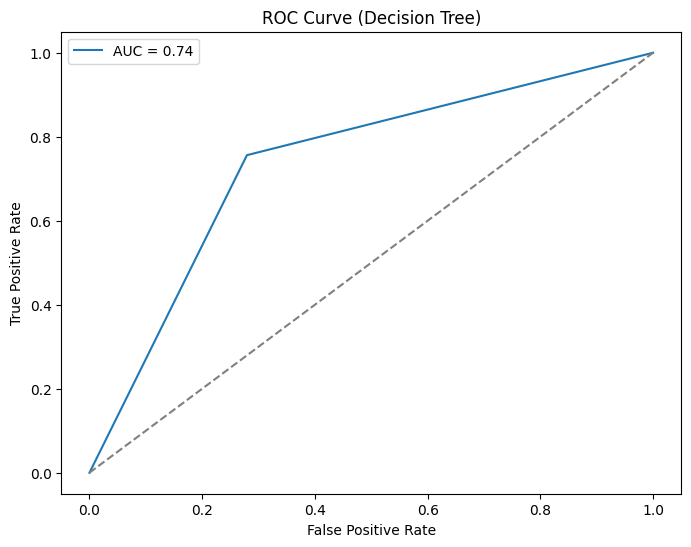

In [174]:
# Plot the ROC curve for the Decision Tree model
plt.figure(figsize=(8, 6))
plt.plot(fpr_dt, tpr_dt, label=f'AUC = {roc_auc_dt:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Decision Tree)')
plt.legend()
plt.show()

# Model Parameters:

* random_state=42: This parameter defines the seed for generating random numbers. As with Logistic Regression, using a fixed seed guarantees training reproducibility.

## Model Evaluation:

* classification_report: This function generates a classification report that includes metrics such as precision, recall and f1-score. This report provides a comprehensive view of the model's performance in different aspects.

* roc_curve and auc: These functions are used to calculate the ROC curve and the area under the curve (AUC-ROC), respectively. The ROC curve and the AUC-ROC value are indicators of the discriminative ability of the model.

## Visualization of the ROC  Curve:

*As with Logistic Regression, the ROC curve is plotted using the matplotlib library. The area under the curve (AUC) is displayed on the curve label.
In summary, the Decision Tree was trained with one parameter to ensure reproducibility, and the evaluation included classification metrics and a ROC curve visualization to evaluate the discriminative ability of the model. The AUC-ROC value of 0.74 suggests a moderate ability to distinguish between positive and negative instances.e negativas.

In [163]:
####################################################################################

## RandomForest Classifier

In [149]:
# Create and train the Random Forest model
random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [150]:
# Make predictions on the test set
y_pred_rf = random_forest_model.predict(X_test)
y_pred_prob_rf = random_forest_model.predict_proba(X_test)[:, 1]

In [151]:
# Evaluation of the Random Forest model
print("AUC-ROC Score (Random Forest):", roc_auc_score(y_test, y_pred_prob_rf))
print("Classification Report (Random Forest):")
print(classification_report(y_test, y_pred_rf))

AUC-ROC Score (Random Forest): 0.9059361549497849
Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       0.80      0.76      0.78        68
           1       0.81      0.84      0.83        82

    accuracy                           0.81       150
   macro avg       0.81      0.80      0.80       150
weighted avg       0.81      0.81      0.81       150



In [169]:
# Calculate ROC curve
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

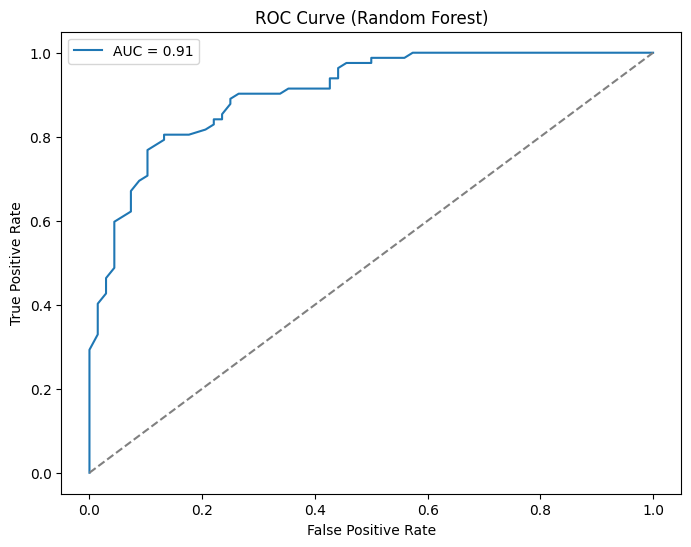

In [170]:
# Plot the ROC curve for the Random Forest model
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label=f'AUC = {roc_auc_rf:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Random Forest)')
plt.legend()
plt.show()

# Model Parameters:

* random_state=42: This parameter defines the seed for generating random numbers, providing reproducibility in the results
*
## Model Evaluation:

* roc_auc_score: Calculates the area under the ROC curve (AUC-ROC), a metric that quantifies the discriminative ability of the model.

* classification_report: Generates a classification report with metrics such as precision, recall and f1-score, providing a comprehensive view of model performance.

* roc_curve and auc: Used to calculate the ROC curve and AUC-ROC value, respectively, providing a visualization of the model's performance at different cutoff points.

## Visualization of the ROC Curve:

* As with previous models, the ROC curve is plotted using the matplotlib library. The AUC-ROC value is displayed on the curve label.
Random Forest was trained and evaluated in a similar way to previous models. The AUC-ROC analysis, which indicates the ability to discriminate,
and the classification report, which provides detailed metrics, helps you understand model performance. The AUC-ROC value of 0.92 suggests a good ability of the model to distinguish between positive and negative instances.
This superior performance can be attributed to the nature of the Random Forest algorithm, which combines multiple decision trees for better generalization and reduced overfitting.

In [ ]:
#############################################################################################

In [153]:
from sklearn.neighbors import KNeighborsClassifier

In [154]:
# Create and train the KNN model
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [160]:
# Make predictions on the test set
y_pred_knn = knn_model.predict(X_test)
y_pred_prob_knn = knn_model.predict_proba(X_test)[:, 1]

In [164]:
conf_matrix4 = confusion_matrix(y_test, y_pred_knn)
print("Confusion Matrix4:")
print(conf_matrix4)

Confusion Matrix4:
[[47 21]
 [11 71]]


In [161]:
# Calcular e imprimir AUC-ROC Score
auc_roc = roc_auc_score(y_test, y_pred_prob_knn)
print("AUC-ROC Score (KNN):", auc_roc)


AUC-ROC Score (KNN): 0.8547345767575323


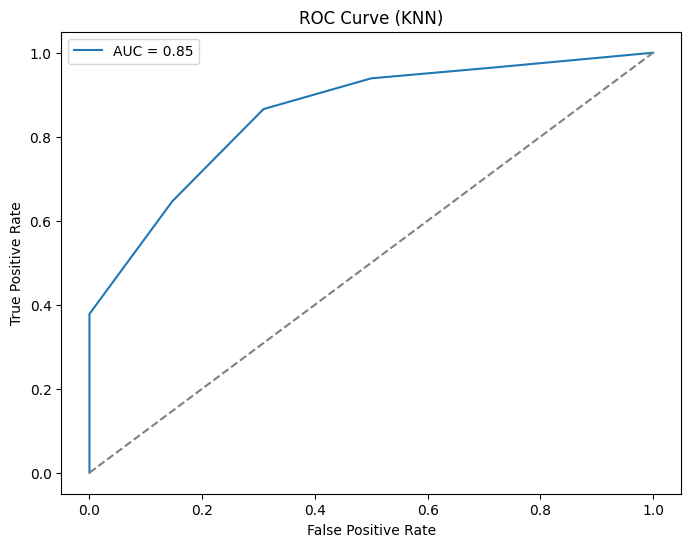

In [165]:
# Plotar a curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_knn)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc_roc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (KNN)')
plt.legend()
plt.show()

# Model Parameters:

* knn default parameters

## Model Evaluation:

* classification_report: This method generates a classification report that includes metrics such as precision, recall and f1-score to evaluate the model's performance.

* confusion_matrix: Provides a confusion matrix detailing the classification results.

* roc_auc_score: Calculates the area under the ROC curve (AUC-ROC), a metric that quantifies the discriminative ability of the model.

* roc_curve: Used to calculate the ROC curve, providing a visualization of the model's performance at different cutoff points.
  
## ROC Curve:
* 
ROC Curve: appears to have a solid performance with an AUC-ROC Score of 0.85, indicating good discriminatory ability. The confusion matrix provides a detailed view of performance across different classes. diferentes classes.

In [178]:
######################################################################################################

In [13]:
df['Outcome'] = df['Outcome'].astype(bool)

In [ ]:
df.to_csv('caminho/para/seu/arquivo/nome_do_arquivo.csv', index=False)